# Reading

Read the introduction and first chapter (pg 1-31) of *Weapons of Math Destruction* and summarize the main ideas below.

1. **O'Neil criticizes a model for scoring teachers. What problems does she see with this model?**
The model used pure-hard undisputable math to measure teachers objectivly but in doing so overlooked many human characterstics that make a good teacher and only used its calculation as the sole determinant of a good teacher. In addition each teacher only had 20-30 students for there calculations which is not enough statisticly to draw any conclusions. Also the model was never corrected to adjust for when it had made a mistake so it just kept making them.

2. **O'Neil also criticizes a model for predicting recidivism. What problems does she see with this model?**
This model uses factors such as upbringing in predicting recidivism while upbringings and expierences are not uniform across the board. The questions posed and variables used in these models thus discriminate against miniroties and poorer people and further fuel systemic problems. It uses factors about who people are to judge them and not there actions. In addition this model has a positive feedback loop where labeling someone as high recidivism actually increases their likelihood of recidivism via giving them a criminal record which limits work and thus leads to crime and so forth. So not only does this model judge based off factors that people cannot control such as family memebers criminal history, socio-economic status, race and much more, it actually causes its predictions to be true.

3. **In contrast, O'Neil approves of predictive modeling in baseball. Why does she call these models healthy?**
O'niel approves of baseball models because there are much more apparant. The stats can clearly be seen by all and models weighting is understandable. In addition there are fewer false correlations drawn as the objective of each player is readily known and all stats are accessible. This prevents discriminatory predictors. In addition with the constant input of new data, these models are regularly adjusted for imporvment which can only improve the models as a whole.

# Dataset

Suppose your company manages a health insurance plan for employees. Each employee makes a monthly contribution, and the company uses the funds to pay for medical costs as they are incurred. The company needs to figure out how to set the contribution amount so that there will be enough to cover the costs. You are therefore asked to build a model to predict employee medical costs.

The company has provided a [dataset](https://myslu.stlawu.edu/~ltorrey/ml/Medical.csv) of 1338 employees with the following variables:
- *age* - years
- *sex* - male/female
- *bmi* - body mass index
- *children* - number of dependent children
- *smoker* - yes/no
- *branch* - CA/NY/TX/IL
- *costs* - medical costs last year

Familiarize yourself with this dataset. Specifically:
1. **Download the data and make sure it's being read in properly.**
2. **Plot the relationship of each predictor with the response, and explain what you see.**

In [2]:
# Download and format the dataset
download.file("https://myslu.stlawu.edu/~ltorrey/ml/Medical.csv", "Medical.csv")
medical <- read.csv("Medical.csv")


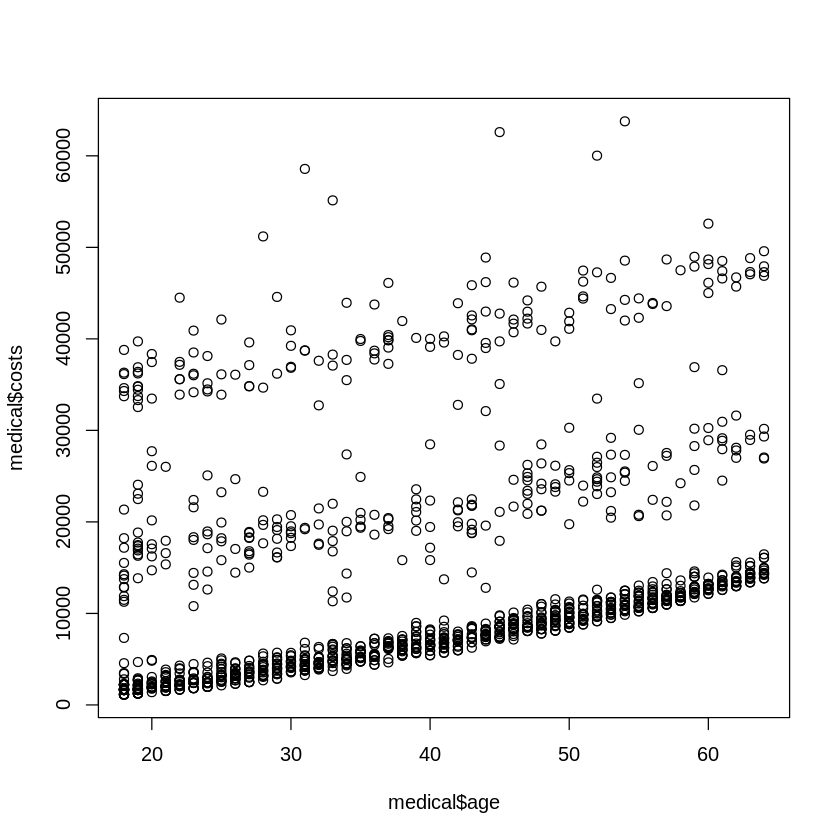

In [36]:
plot(medical$age, medical$costs)

Age appears to have a linear relationship with costs with many individuals having a baseline that increases as age does. Similarly there appears to be 2 more expensive medical cost groups that also increase linearly giving the appearance of 3 linear lines increasing as age does.

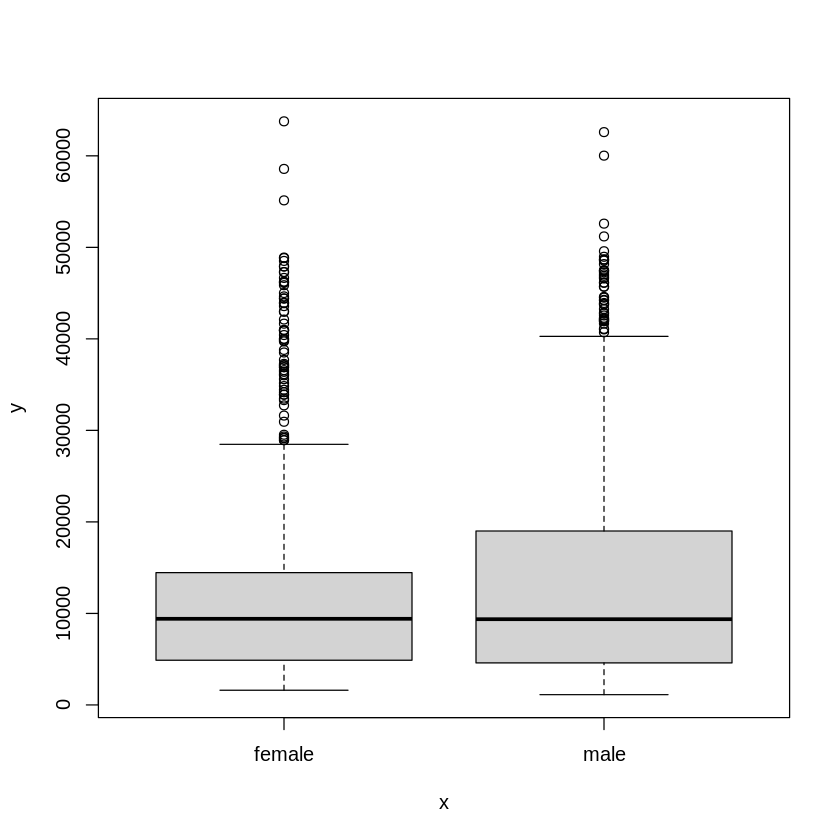

In [20]:
medical$sex <- as.factor(medical$sex)
plot(medical$sex, medical$costs)

Both females and males seem to have similar mean costs and lower spreads; however, the males whisker extends beyond the womens by almost $10,000 indicating a trend for higher cost individuals in males. Both groups have a large number of outliers.

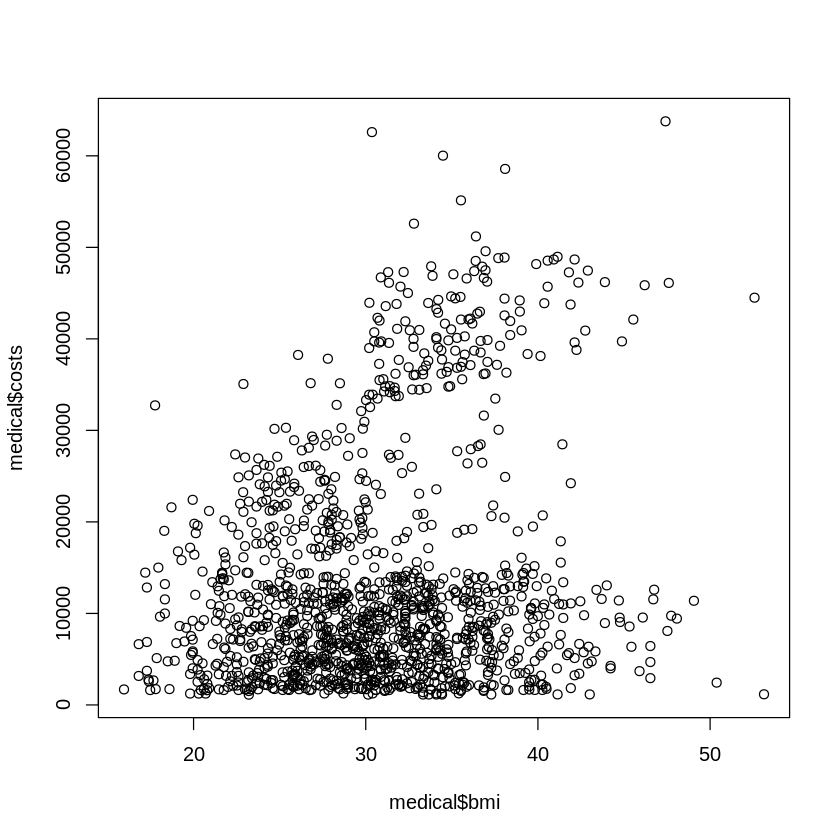

In [33]:
medical$smoker <- as.factor(medical$smoker)
plot(medical$bmi, medical$costs)


The relationship between BMI and medical costs is not visiable apparant. There is a trend of higher costs have higher BMI's but no clear trend.

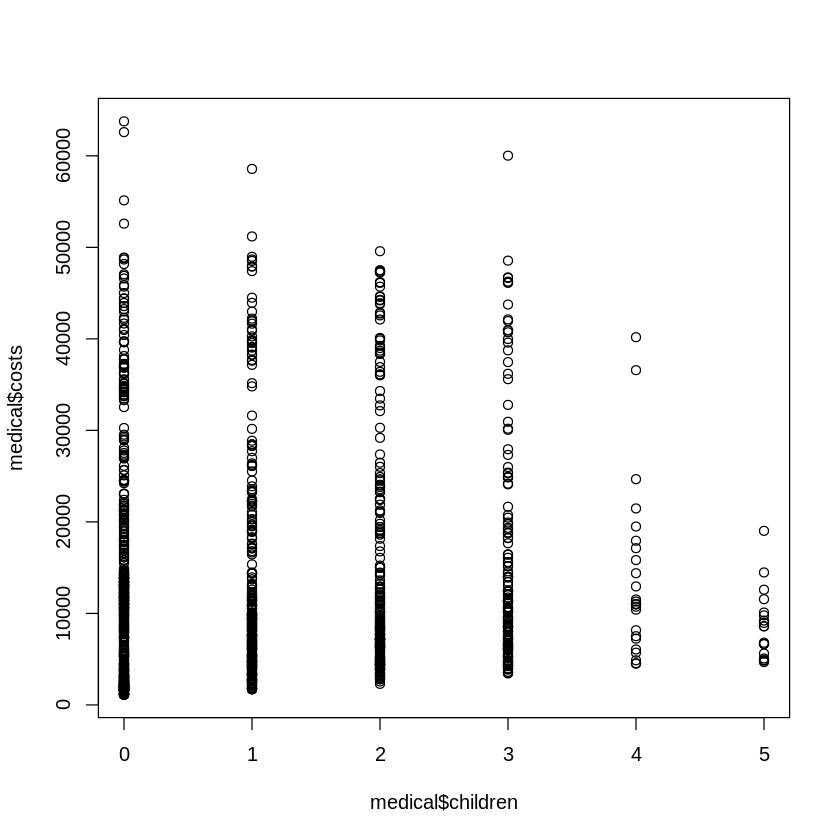

In [25]:
plot(medical$children, medical$costs)


Initially it appears that those with fewer children have a much wider spread of costs and includes much higher costs then those with many kids. But upon further analysis it is clear that there are much more data points in lower children count factors which could account for some of this.

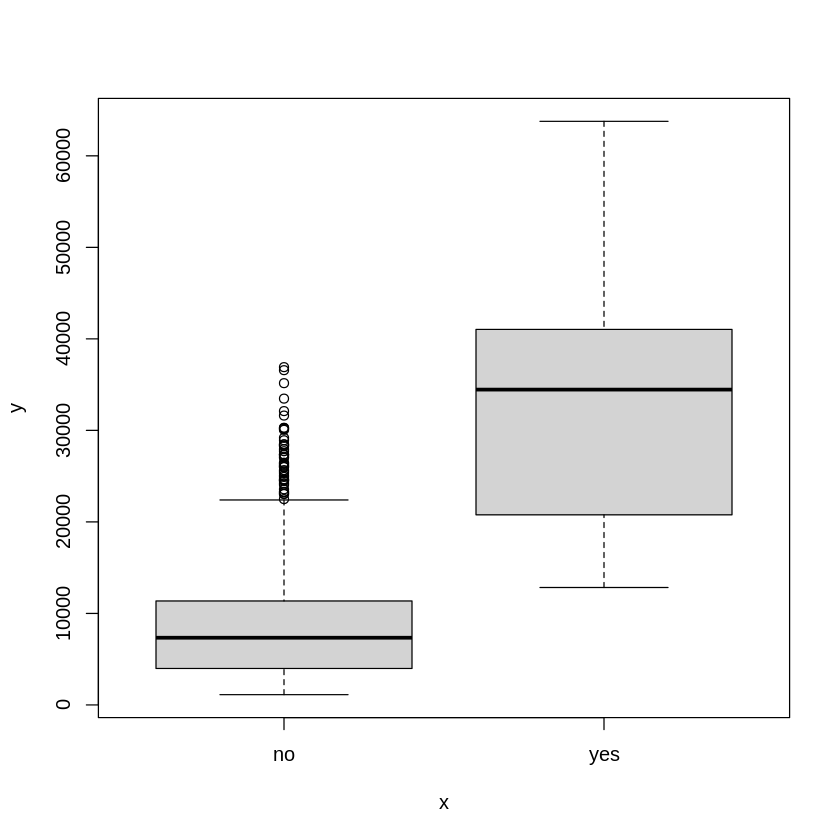

In [30]:
medical$smoker <- as.factor(medical$smoker)
plot(medical$smoker, medical$costs)

Smokers have a much higher mean and spread then non-smokers. The high outliars of the non-smokers are at or below the middle 50% of the smokers in cost. The smokers also do not have any outliars.

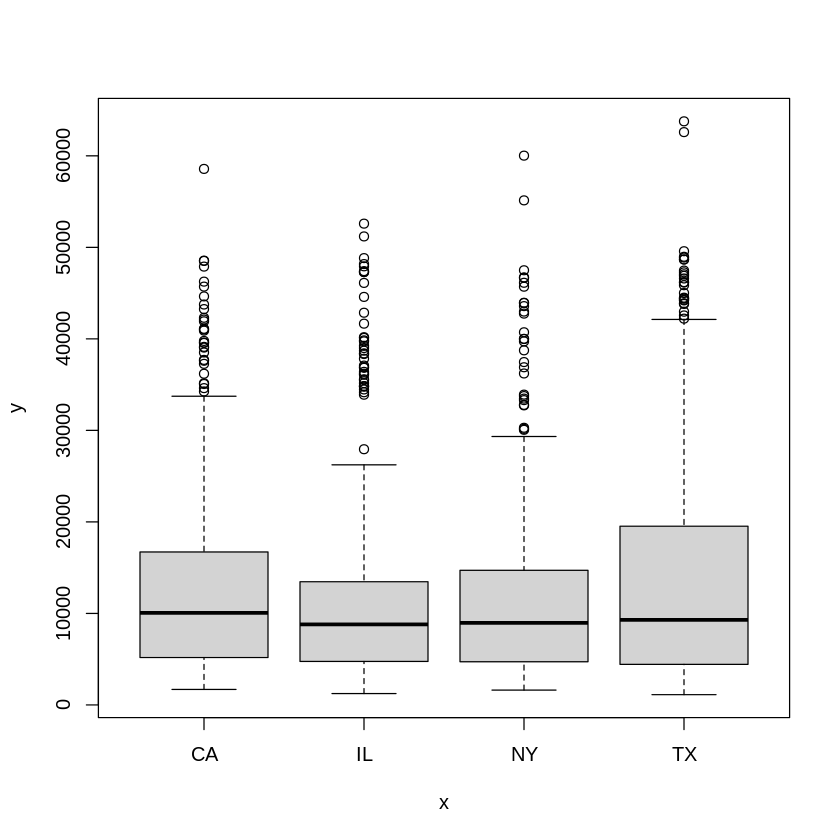

In [40]:
medical$branch <- as.factor(medical$branch)
plot(medical$branch, medical$costs)

All branches have similar means and low cost distributions. The IL branch has the lowerest upper whisker of the branches. All branches have many outliars with TX and CA having the highest upper whiskers.

# Baseline

Build and interpret a baseline model. Specifically:

1. **Construct a pure linear model using all the predictors.**
2. **Describe what it tells you about each predictor.**

In [33]:
full.lm <- lm(costs ~ bmi+age+sex+children+smoker+branch, data = medical)
summary(full.lm)


Call:
lm(formula = costs ~ bmi + age + sex + children + smoker + branch, 
    data = medical)

Residuals:
     Min       1Q   Median       3Q      Max 
-11304.9  -2848.1   -982.1   1393.9  29992.8 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -11938.5      987.8 -12.086  < 2e-16 ***
bmi            339.2       28.6  11.860  < 2e-16 ***
age            256.9       11.9  21.587  < 2e-16 ***
sexmale       -131.3      332.9  -0.394 0.693348    
children       475.5      137.8   3.451 0.000577 ***
smokeryes    23848.5      413.1  57.723  < 2e-16 ***
branchIL      -960.0      477.9  -2.009 0.044765 *  
branchNY      -353.0      476.3  -0.741 0.458769    
branchTX     -1035.0      478.7  -2.162 0.030782 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6062 on 1329 degrees of freedom
Multiple R-squared:  0.7509,	Adjusted R-squared:  0.7494 
F-statistic: 500.8 on 8 and 1329 DF,  p-value: < 2.2e-16


Using a pure linear model of all predictors our model has an adjusted R-sqrd of 0.7494 (which is good but not great) and extremely small p-value. In addition we can see that BMI, age, children, and smoker are all strong predictors while sex and branch had little to no strength as predictors. In addition, the intercept was also a strong predictor.

# Investigation

Investigate whether this data violates either of the core assumptions of linear regression. Specifically:

1. **Look for any important nonlinear effects, and explain your findings.**
2. **Look for any important interactions, and explain your findings.**


Call:
lm(formula = costs ~ poly(bmi, degree = 2), data = medical)

Residuals:
   Min     1Q Median     3Q    Max 
-18100  -8152  -3847   4843  49198 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)             13270.4      324.6  40.882  < 2e-16 ***
poly(bmi, degree = 2)1  87825.9    11873.5   7.397 2.46e-13 ***
poly(bmi, degree = 2)2 -12365.4    11873.5  -1.041    0.298    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11870 on 1335 degrees of freedom
Multiple R-squared:  0.04012,	Adjusted R-squared:  0.03868 
F-statistic:  27.9 on 2 and 1335 DF,  p-value: 1.349e-12


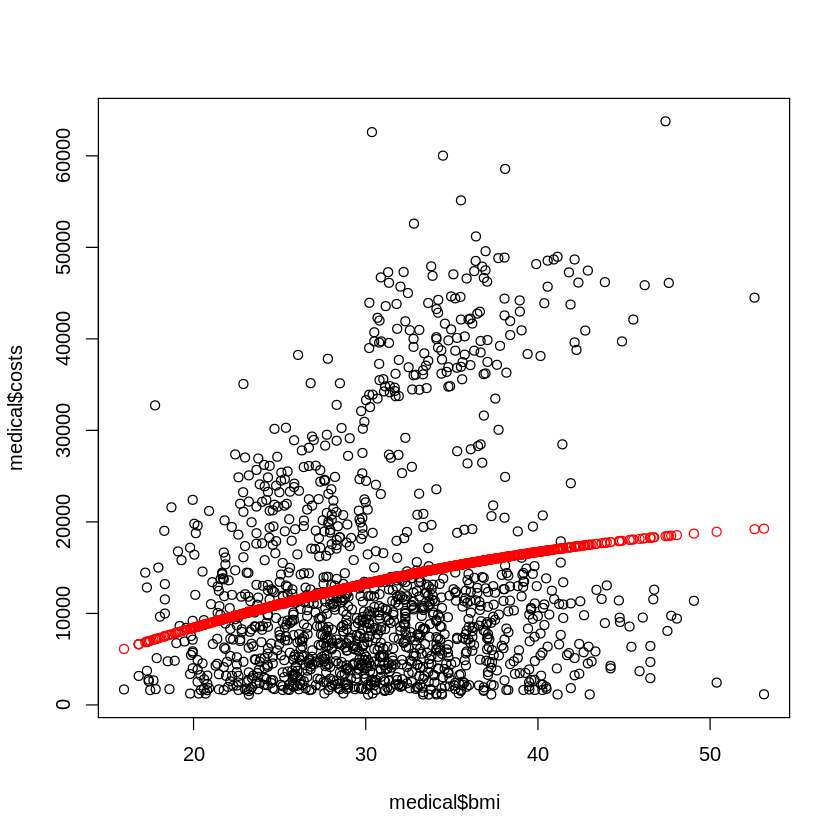

In [26]:
poly.lm <- lm(costs ~ poly(bmi, degree = 2), data = medical)
summary(poly.lm)
plot(medical$bmi, medical$costs)
points(medical$bmi, predict(poly.lm), col = "red")


Call:
lm(formula = costs ~ poly(children, degree = 4), data = medical)

Residuals:
   Min     1Q Median     3Q    Max 
-12648  -8742  -3885   3599  51410 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  13270.4      329.5  40.269   <2e-16 ***
poly(children, degree = 4)1  30109.8    12054.4   2.498   0.0126 *  
poly(children, degree = 4)2 -27692.3    12054.4  -2.297   0.0218 *  
poly(children, degree = 4)3 -25416.5    12054.4  -2.108   0.0352 *  
poly(children, degree = 4)4   7679.3    12054.4   0.637   0.5242    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12050 on 1333 degrees of freedom
Multiple R-squared:  0.01213,	Adjusted R-squared:  0.009166 
F-statistic: 4.092 on 4 and 1333 DF,  p-value: 0.002665


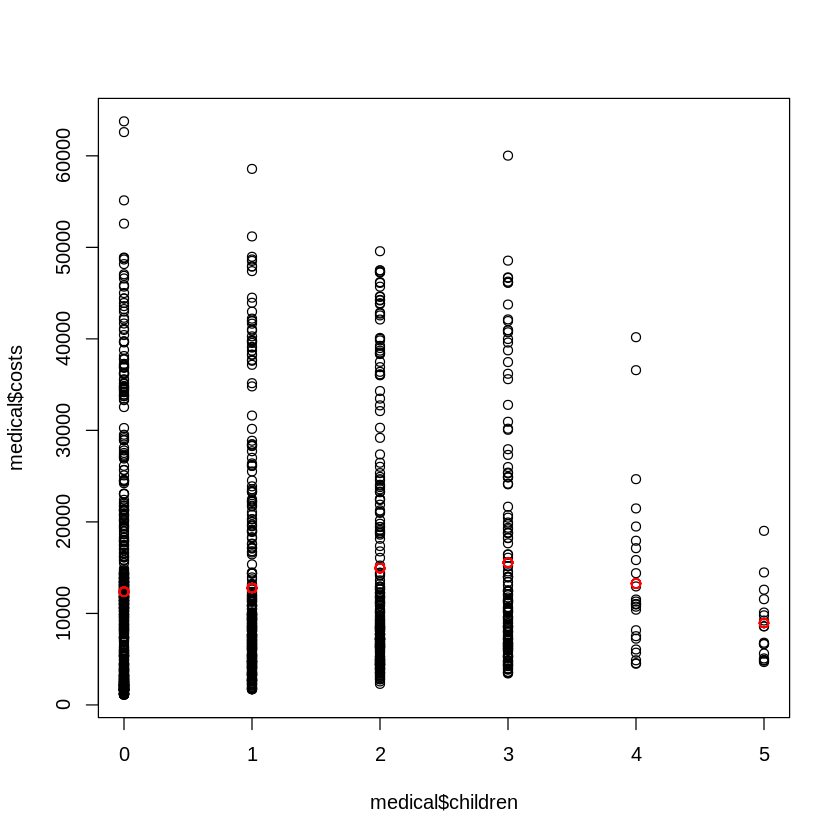

In [11]:
poly.lm <- lm(costs ~ poly(children, degree = 4), data = medical)
summary(poly.lm)
plot(medical$children, medical$costs)
points(medical$children, predict(poly.lm), col = "red")


Call:
lm(formula = costs ~ poly(age, degree = 2), data = medical)

Residuals:
   Min     1Q Median     3Q    Max 
 -7594  -6640  -5943   5334  48240 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)               13270        316   42.00   <2e-16 ***
poly(age, degree = 2)1   132402      11557   11.46   <2e-16 ***
poly(age, degree = 2)2    15260      11557    1.32    0.187    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11560 on 1335 degrees of freedom
Multiple R-squared:  0.09059,	Adjusted R-squared:  0.08923 
F-statistic:  66.5 on 2 and 1335 DF,  p-value: < 2.2e-16


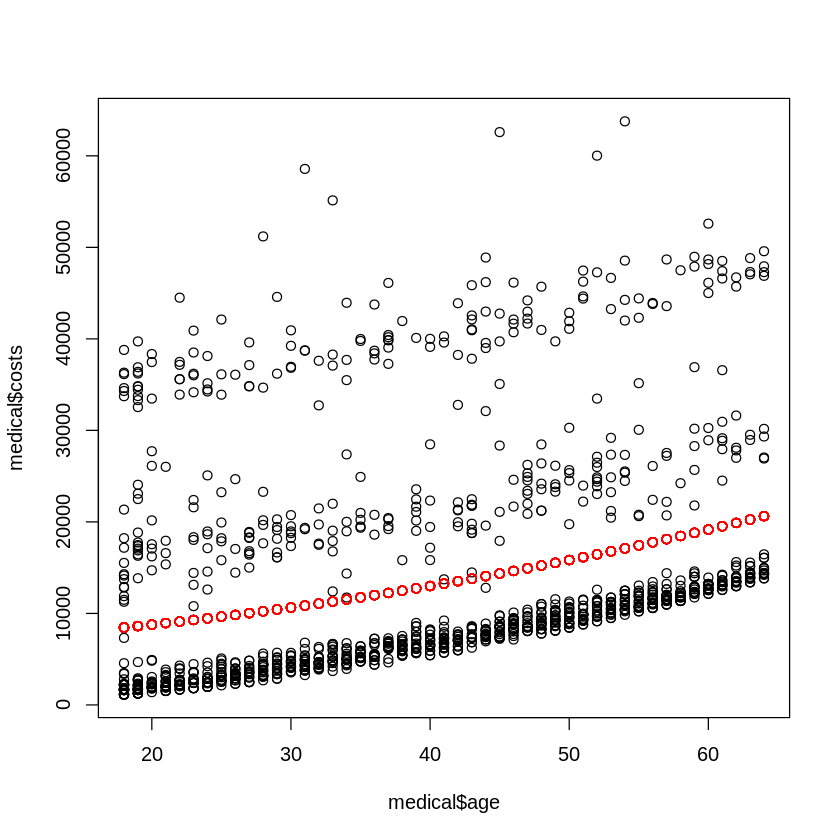

In [23]:
poly.lm <- lm(costs ~ poly(age, degree = 2), data = medical)
summary(poly.lm)
plot(medical$age, medical$costs)
points(medical$age, predict(poly.lm), col = "red")

I first tried polynomial interactions with varying degrees amongst a handful of the variables and did not find any significant predictors that were better enough then linear to be worth using via Occam's razor principle. The adj. R sqred values remained relativly similar between linear and 2-5 degree polynomials. Following this I then tried some splines.


Call:
lm(formula = costs ~ ns(age, df = 4), data = medical)

Residuals:
   Min     1Q Median     3Q    Max 
 -7883  -6675  -5994   5310  48309 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        8356.1      933.3   8.953  < 2e-16 ***
ns(age, df = 4)1   4908.6     1546.9   3.173  0.00154 ** 
ns(age, df = 4)2   6441.2     1441.0   4.470 8.48e-06 ***
ns(age, df = 4)3  12177.7     2550.9   4.774 2.01e-06 ***
ns(age, df = 4)4  11835.8     1506.7   7.855 8.15e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11560 on 1333 degrees of freedom
Multiple R-squared:  0.09085,	Adjusted R-squared:  0.08812 
F-statistic:  33.3 on 4 and 1333 DF,  p-value: < 2.2e-16


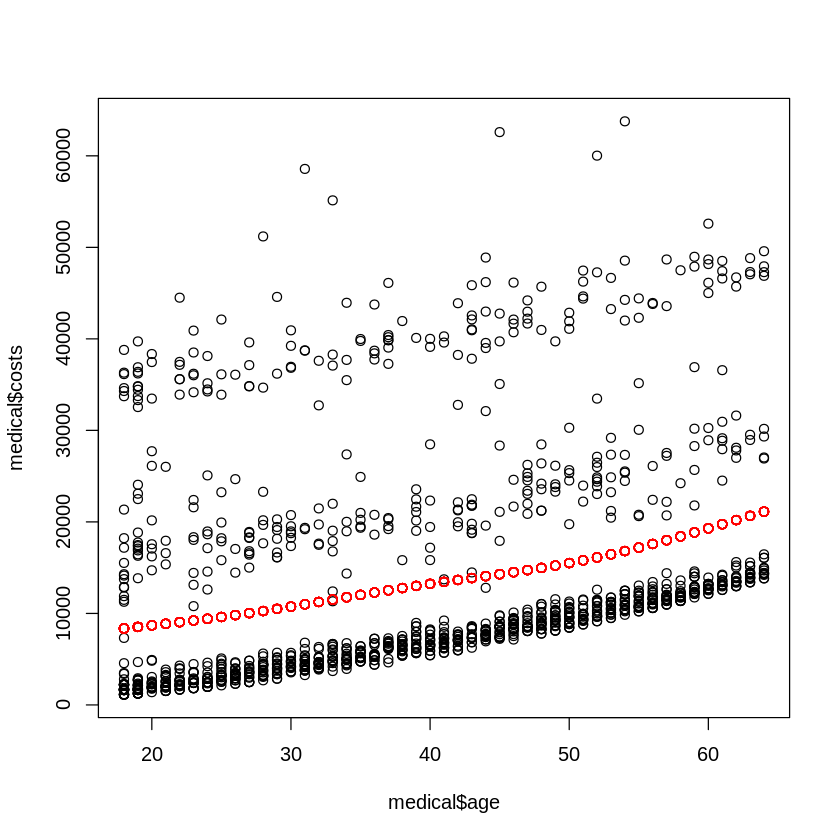

In [28]:
library(splines) #ns
spline.lm <-lm(costs ~ ns(age, df = 4), data = medical)
summary(spline.lm)
plot(medical$age, medical$costs)
points(medical$age, predict(spline.lm), col = "red")


Call:
lm(formula = costs ~ ns(bmi, df = 4), data = medical)

Residuals:
   Min     1Q Median     3Q    Max 
-16143  -7989  -3883   4640  49735 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)          7843       2521   3.111   0.0019 ** 
ns(bmi, df = 4)1     4729       2403   1.967   0.0493 *  
ns(bmi, df = 4)2    10891       2228   4.888 1.14e-06 ***
ns(bmi, df = 4)3    10934       5849   1.869   0.0618 .  
ns(bmi, df = 4)4     4371       4259   1.026   0.3049    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11860 on 1333 degrees of freedom
Multiple R-squared:  0.043,	Adjusted R-squared:  0.04012 
F-statistic: 14.97 on 4 and 1333 DF,  p-value: 5.64e-12


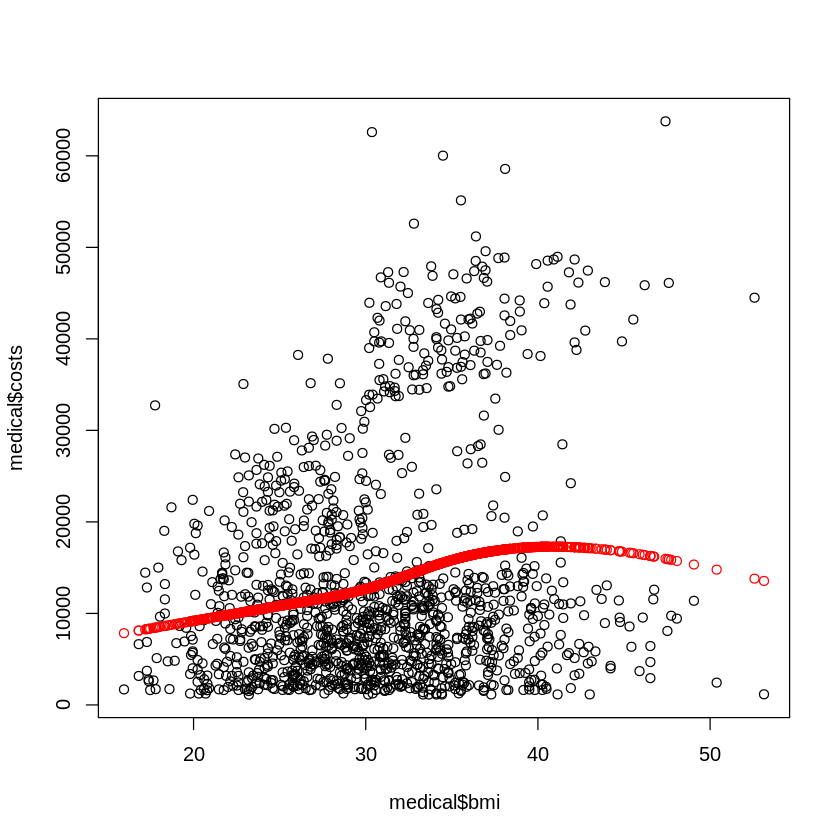

In [32]:
spline.lm <-lm(costs ~ ns(bmi, df = 4), data = medical)
summary(spline.lm)
plot(medical$bmi, medical$costs)
points(medical$bmi, predict(spline.lm), col = "red")

Similar to the polynomials, my spline predictors were not significantly stronger then the linear predictors as seen by the minimal changes in the adj. R sqred values and thus were not worth implementing. Following this I looked for interactions between variables.

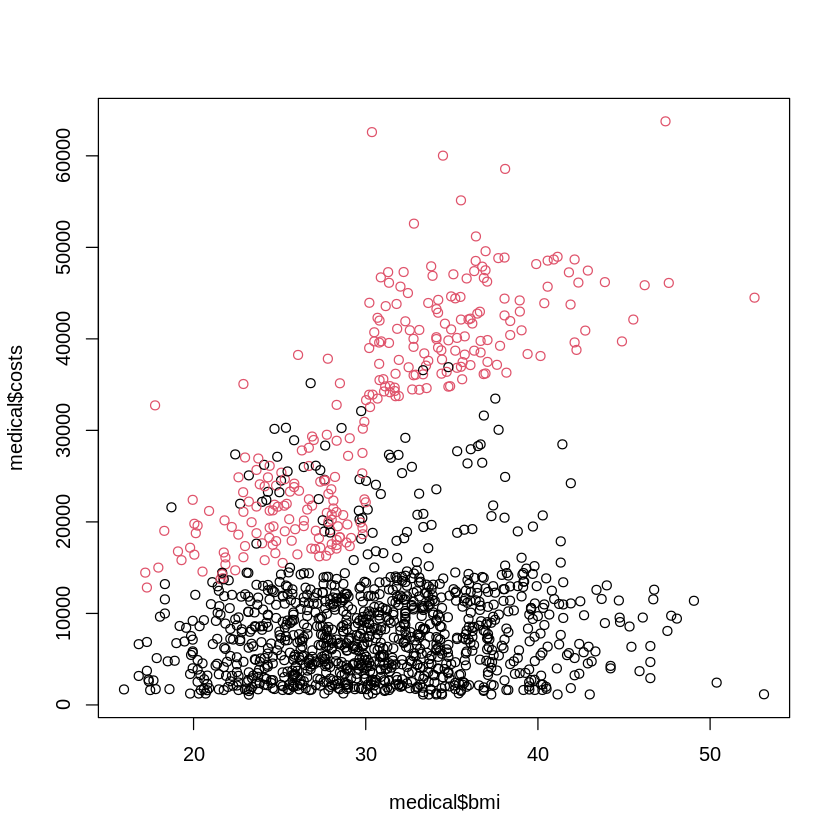

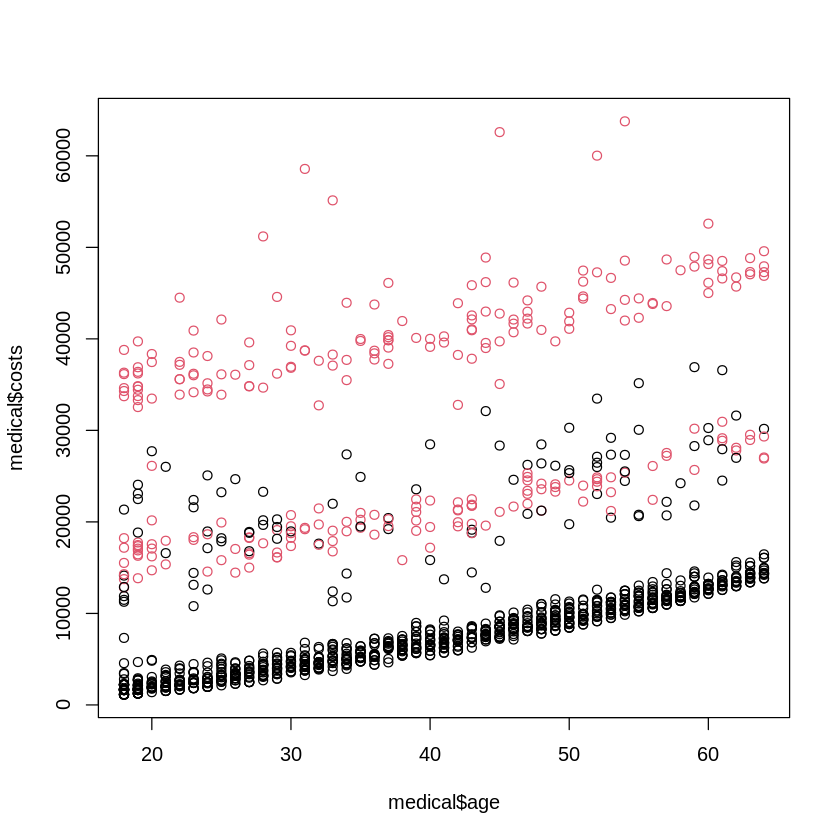

In [35]:
plot(medical$bmi, medical$costs, col = medical$smoker)
plot(medical$age, medical$costs, col = medical$smoker)


In both bmi and age, those that smoke seem to be set apart from the population. In the bmi plot, those that smoke appear to make up the majority of more expensive patients. In the age plot, smokers compose the majority of the second higher cost linear line and entrely make up the most expensive line across the top of the plot. This could indicate strong interactions between these variables and cost and should be tested in a model.

# Model

Build and assess your final model. Specifically:

1. **Construct the best model you can based on your findings above.**
2. **Compare the final model fit to the baseline model fit, and explain the difference.**

In [57]:
library(boot) #cv.glm

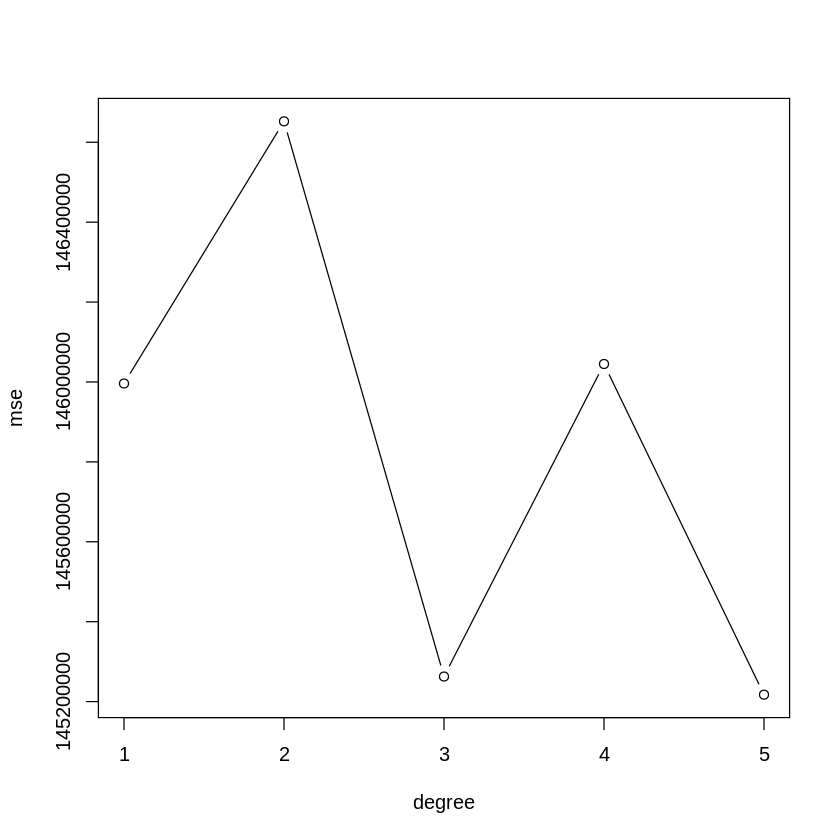

In [43]:
degree <- seq(1,5)
mse <- rep(0,5)

for (i in degree){
  model <- glm(costs ~ poly(children, i), data = medical)
  mse[i]<- cv.glm(medical, model, K = 5)$delta[1]
}
plot(degree, mse, type = "b")

Using the children variable as polynomial predictor decreases the mse slightly and might be useful for making the "best" model via highest adj. R sqred model but might be best not to include via Occam's razor principle.

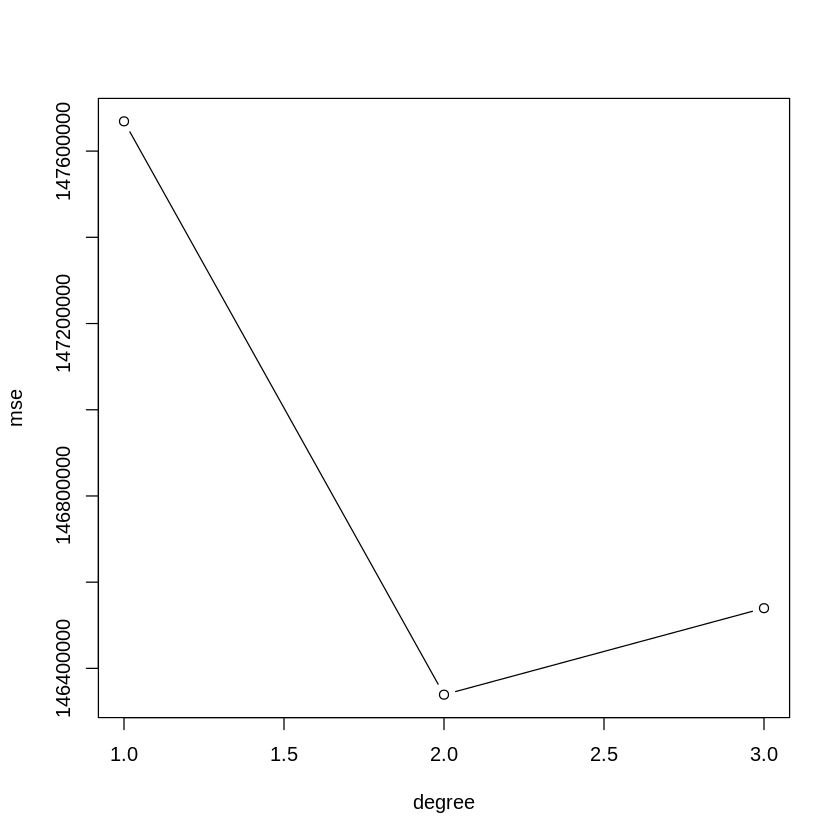

In [68]:
degree <- seq(1,3)
mse <- rep(0,3)

for (i in degree){
  model <- glm(costs ~ poly(branch, i), data = medical)
  mse[i]<- cv.glm(medical, model, K = 5)$delta[1]
}
plot(degree, mse, type = "b")

Using the branch as a polynomial predictor is marginally better then the linear one with a degree of 2 or 3 but similar to the polynomial for children it is fairly marginal so might be best to not include.


In [92]:
gam.lm <- lm(costs ~ bmi:smoker+age+smoker+sex+children+poly(branch, 3), data = medical)
summary(gam.lm)


Call:
lm(formula = costs ~ bmi:smoker + age + smoker + sex + children + 
    poly(branch, 3), data = medical)

Residuals:
     Min       1Q   Median       3Q      Max 
-14580.7  -1857.2  -1360.8   -475.7  30552.4 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -2993.916    856.628  -3.495  0.00049 ***
age                 263.620      9.516  27.703  < 2e-16 ***
smokeryes        -20415.611   1648.277 -12.386  < 2e-16 ***
sexmale            -500.146    266.518  -1.877  0.06079 .  
children            516.403    110.179   4.687 3.06e-06 ***
poly(branch, 3)1 -12331.060   4972.949  -2.480  0.01328 *  
poly(branch, 3)2   5380.205   4896.804   1.099  0.27209    
poly(branch, 3)3 -12719.175   4908.041  -2.591  0.00966 ** 
bmi:smokerno         23.533     25.601   0.919  0.35814    
bmi:smokeryes      1466.629     47.059  31.166  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4846 on 1328 degr

This model uses an interaction between BMI and smoking, with a linear age, smoker, sex and children predictors in addition to a polynomial branch predictor with a degree of 3. This is the model with the highest adj. R sqred value I could find. That being said the gains from including branch as a polynomial is .012 which is fairly minimal and could be eliminated with Occam's razor principle. The minimal gains is also true for sex, children and the linear smoker variable but all of these are labeled as important predictors (as opposed to the polynomial branch predictor has a ** and * label).